In [166]:
import radiomics
from radiomics import featureextractor, imageoperations
from IPython.display import Image
from Pil

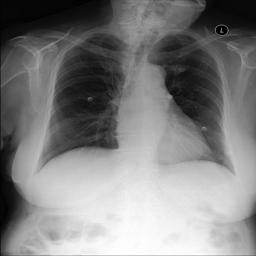

In [177]:
Image('/mnt/workspace/mimic-cxr-jpg/images-small/p10/p10325086/s55833271/8bbde4a8-3fb9cae5-44e03fab-6347d666-ff7902ec.jpg')

(2597, 2330)

/home/pamessina/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  if sys.path[0] == '':


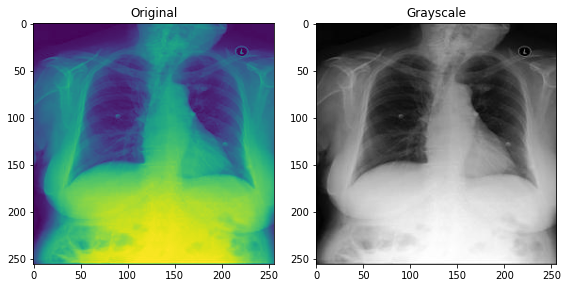

In [178]:
from skimage import io
from skimage.color import rgb2gray

import numpy as np
import matplotlib.pyplot as plt

import SimpleITK as sitk
from radiomics import featureextractor

original = io.imread('/mnt/workspace/mimic-cxr-jpg/images-small/p10/p10325086/s55833271/8bbde4a8-3fb9cae5-44e03fab-6347d666-ff7902ec.jpg')
 
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [139]:
import SimpleITK as sitk
import numpy as np

grayscale = np.array(grayscale)
im = sitk.GetImageFromArray(grayscale)
ma = np.ones(grayscale.shape, dtype='uint8')
ma[0][0] = 0
ma = sitk.GetImageFromArray(ma)

# or extract features:
from radiomics import featureextractor
extractor = featureextractor.RadiomicsFeatureExtractor()
extractor.enableAllFeatures()
extractor.enableFeatureClassByName('shape', False)
extractor.enableImageTypes(Original={}, Wavelet={}, LBP2D={}, Square={}, Logarithm={})

In [150]:
def extract_feature_array(image_path, extractor):
    original = io.imread(image_path)
    grayscale = rgb2gray(original)
    img = sitk.GetImageFromArray(grayscale)
    mask = np.ones(grayscale.shape, dtype='uint8')
    mask[0][0] = 0
    mask = sitk.GetImageFromArray(mask)    
    features = extractor.execute(img, mask)
    feat_flat = []
    for key in features.keys():
        if key.startswith('diag'):
            continue
        val = features[key]
        if type(val) is np.float64:
            feat_flat.append(val)
        else:
            assert type(val) is np.ndarray
            if len(val.shape) == 0:
                feat_flat.append(val + 0)
            else:
                feat_flat.extend(val)
    feat_flat = np.array(feat_flat, dtype=np.float64)
    return feat_flat

In [179]:
x = extract_feature_array('/mnt/workspace/mimic-cxr-jpg/images-small/p10/p10325086/s55833271/8bbde4a8-3fb9cae5-44e03fab-6347d666-ff7902ec.jpg',
                     extractor)

/home/pamessina/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  This is separate from the ipykernel package so we can avoid doing imports until
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmet

In [180]:
x.shape, x[:10]

((753,),
 array([ 9.99954578e-01,  2.95603338e+02,  3.61332257e+02,  6.55345000e+04,
         2.95589911e+02,  1.02224264e+03,  1.55985418e-02,  6.55350000e+04,
         8.87740298e-01, -1.37976159e+00]))

In [172]:
x.shape, x[:10]

((753,),
 array([ 8.97189048e-01,  2.99875658e+03,  3.48835921e+03,  6.05100850e+06,
         2.69045156e+03,  9.85224264e+03,  1.62819845e-03,  6.05100900e+06,
         8.85082420e-01, -1.48021144e+00]))

In [164]:
x.shape, x[:10]

((753,),
 array([ 9.94174724e-01,  5.94667417e+02,  7.25497071e+02,  2.63678500e+05,
         5.91203316e+02,  2.05224264e+03,  7.78312468e-03,  2.63679000e+05,
         8.86979505e-01, -1.39259877e+00]))

In [161]:
x = extract_feature_array('/mnt/workspace/mimic-cxr-jpg/images-small/p14/p14147380/s57782283/73d4997e-feb25b04-950b45f1-533d848a-d9f29409.jpg',
                     extractor)

/home/pamessina/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  This is separate from the ipykernel package so we can avoid doing imports until
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmet

In [162]:
x.shape, x[:10]

((753,),
 array([ 9.99954578e-01,  2.95603338e+02,  3.61332257e+02,  6.55345000e+04,
         2.95589911e+02,  1.02224264e+03,  1.55985418e-02,  6.55350000e+04,
         8.87740298e-01, -1.40273856e+00]))

In [143]:
for key in x:
    if not key.startswith('diag'):
        print(key, x[key])

original_shape2D_Elongation 0.9999545781444937
original_shape2D_MajorAxisLength 295.60333782508854
original_shape2D_MaximumDiameter 361.33225707096784
original_shape2D_MeshSurface 65534.5
original_shape2D_MinorAxisLength 295.5899109729907
original_shape2D_Perimeter 1022.2426406871193
original_shape2D_PerimeterSurfaceRatio 0.015598541847227329
original_shape2D_PixelSurface 65535.0
original_shape2D_Sphericity 0.8877402976679111
original_firstorder_10Percentile 25.0
original_firstorder_90Percentile 231.0
original_firstorder_Energy 1435479529.0
original_firstorder_Entropy 3.387769873713476
original_firstorder_InterquartileRange 128.0
original_firstorder_Kurtosis 1.7847603267832444
original_firstorder_Maximum 255.0
original_firstorder_MeanAbsoluteDeviation 63.86890261222941
original_firstorder_Mean 128.35539787899594
original_firstorder_Median 128.0
original_firstorder_Minimum 0.0
original_firstorder_Range 255.0
original_firstorder_RobustMeanAbsoluteDeviation 51.65662095657261
original_firs